In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("bestsellers with categories.csv")

In [14]:
data.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [18]:
data.tail()

Name       Author  \
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  Jeff Kinney   
546  You Are a Badass: How to Stop Doubting Your Gr...  Jen Sincero   
547  You Are a Badass: How to Stop Doubting Your Gr...  Jen Sincero   
548  You Are a Badass: How to Stop Doubting Your Gr...  Jen Sincero   
549  You Are a Badass: How to Stop Doubting Your Gr...  Jen Sincero   

     User Rating  Reviews  Price  Year        Genre  
545          4.9     9413      8  2019      Fiction  
546          4.7    14331      8  2016  Non Fiction  
547          4.7    14331      8  2017  Non Fiction  
548          4.7    14331      8  2018  Non Fiction  
549          4.7    14331      8  2019  Non Fiction

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [16]:
data.shape

(550, 7)

In [17]:
data.describe()

User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

In [19]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [46]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [25]:
corelation = data.corr()

<AxesSubplot:>

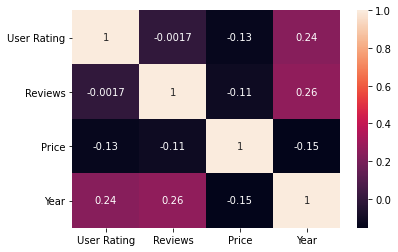

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
           ,annot=True)

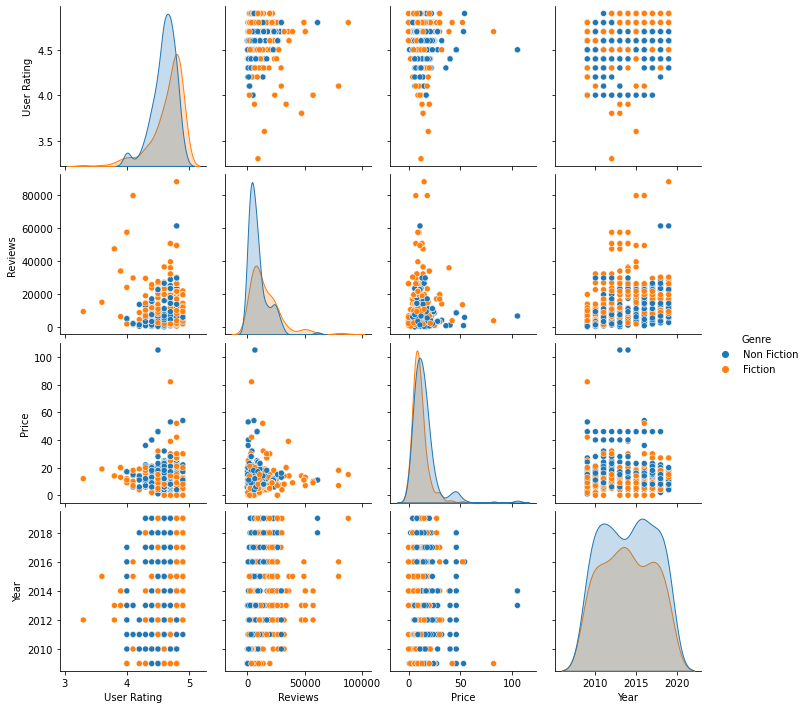

In [57]:
#GenreTrends
sns.pairplot(data,hue='Genre')

In [53]:
#Book with Highest Rating 
data_new = data.groupby(['Name','Author','Genre'],as_index=False)[['User Rating','Reviews']].mean()
data_new = data_new[data_new['Reviews']>data_new['Reviews'].mean()]
data_new = data_new.sort_values('User Rating',ascending=False)
data_new.head(10)

Name              Author  \
151  Last Week Tonight with John Oliver Presents A ...          Jill Twiss   
120  Harry Potter and the Sorcerer's Stone: The Ill...        J.K. Rowling   
116  Harry Potter and the Chamber of Secrets: The I...        J.K. Rowling   
69   Dog Man: Fetch-22: From the Creator of Captain...          Dav Pilkey   
36            Brown Bear, Brown Bear, What Do You See?     Bill Martin Jr.   
310                        The Very Hungry Caterpillar          Eric Carle   
140  Jesus Calling: Enjoying Peace in His Presence ...         Sarah Young   
178                          Oh, the Places You'll Go!           Dr. Seuss   
257                                    The Hate U Give        Angie Thomas   
230  The Boys in the Boat: Nine Americans and Their...  Daniel James Brown   

           Genre  User Rating  Reviews  
151      Fiction          4.9  11881.0  
120      Fiction          4.9  10052.0  
116      Fiction          4.9  19622.0  
69       Fiction          4.9  12619.0  
36       Fiction          4.9  14344.0  
310      Fiction          4.9  19546.0  
140  Non Fiction          4.9  19576.0  
178      Fiction          4.9  21834.0  
257      Fiction          4.8   9947.0  
230  Non Fiction          4.8  23358.0

<AxesSubplot:xlabel='Reviews', ylabel='Name'>

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


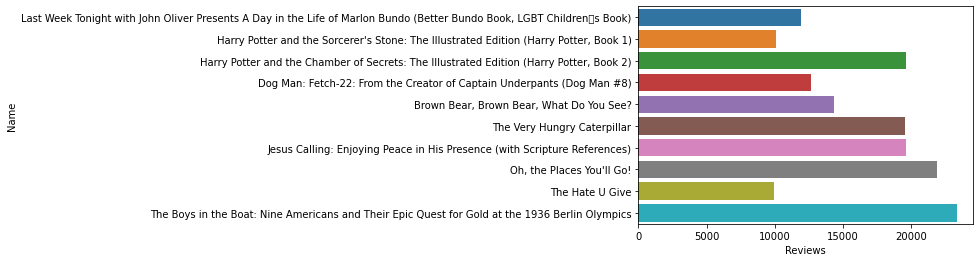

In [62]:
sns.barplot(x="Reviews",y="Name",data=data_new.head(10))
plt.title("Review Top 10 Books With Highest Ratings")

In [65]:
#Best Author for Ratings
data_auth = data.groupby(['Author'],as_index=False)['User Rating'].mean().sort_values('User Rating',ascending=False)
data_auth

Author  User Rating
123       Jill Twiss          4.9
173   Nathan W. Pyle          4.9
41       Chip Gaines          4.9
206    Rush Limbaugh          4.9
26   Bill Martin Jr.          4.9
..               ...          ...
180    Paula Hawkins          4.1
171   Muriel Barbery          4.0
100    Gillian Flynn          4.0
90            Gallup          4.0
71       Donna Tartt          3.9

[248 rows x 2 columns]

Text(0.5, 1.0, 'Best Author with High Ratings')

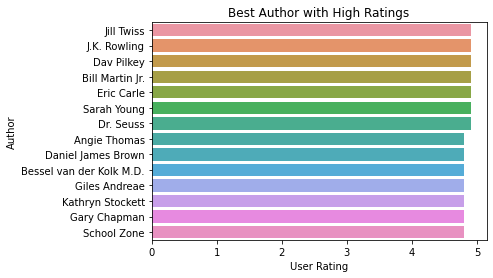

In [81]:
sns.barplot(x="User Rating",y="Author",data=data_new.head(15))
plt.title("Best Author with High Ratings")

In [82]:
#AverageRating by Genre 
data_genre = data.groupby(['Genre'],as_index=False)['User Rating'].mean()
data_genre

Genre  User Rating
0      Fiction     4.648333
1  Non Fiction     4.595161

In [83]:
#BookPrice
dt_price = data.groupby(['Name','Author','Genre'],as_index=False)['Price'].mean()
dt_price = dt_price.sort_values('Price',ascending=False)
dt_price

Name  \
56   Diagnostic and Statistical Manual of Mental Di...   
307                       The Twilight Saga Collection   
112                           Hamilton: The Revolution   
228  The Book of Basketball: The NBA According to T...   
115         Harry Potter Paperback Box Set (Books 1-7)   
..                                                 ...   
159                                  Little Blue Truck   
92                         Frozen (Little Golden Book)   
139                               JOURNEY TO THE ICE P   
235              The Constitution of the United States   
244                                        The Getaway   

                               Author        Genre  Price  
56   American Psychiatric Association  Non Fiction  105.0  
307                   Stephenie Meyer      Fiction   82.0  
112                Lin-Manuel Miranda  Non Fiction   54.0  
228                      Bill Simmons  Non Fiction   53.0  
115                     J. K. Rowling      Fiction   52.0  
..                                ...          ...    ...  
159                    Alice Schertle      Fiction    0.0  
92                          RH Disney      Fiction    0.0  
139                         RH Disney      Fiction    0.0  
235  Delegates of the Constitutional
  Non Fiction    0.0  
244                       Jeff Kinney      Fiction    0.0  

[351 rows x 4 columns]

Text(0.5, 1.0, 'Top 10 Most Expensive Books')

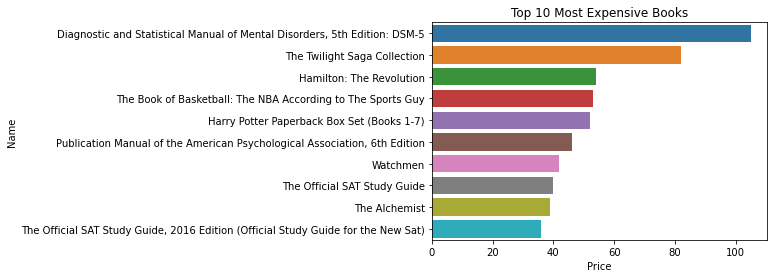

In [84]:
sns.barplot(y="Name",x="Price",data=dt_price.head(10))
plt.title("Top 10 Most Expensive Books")